## Documentation is best thing for revision i do while listening to the lecures of jovian in codecamp, stat quest yt , if i do stuck i will add the instructions where i stucked and use gimini or chat gpt to rectify the errors and i place insights of it
- while building this note book i used mostly gemini to undertand what are the errors what flow should i follow
- I browse through internet and place images if that are give intution to it .
I alwas place the ml architecure to undertand flow while learning so that i can refer any time it easy to analyse the code


* * *

# Summary of Notebook Steps (i made this summary with gemini to make proper sturcure after completion of this project  )

This notebook demonstrates a complete machine learning workflow for predicting rainfall in Australia using Logistic Regression. Here's a summary of the key steps performed:

## 1. Project Setup and Data Loading

- Necessary libraries like `pandas`, `numpy`, and modules from `sklearn` for preprocessing and modeling were imported.
- The "Weather Dataset (Rattle Package)" was downloaded from Kaggle using `opendatasets`.
- The dataset was loaded into a pandas DataFrame.
- Rows with missing values in the target columns (`RainToday` and `RainTomorrow`) were removed to ensure data quality for supervised learning.

## 2. Data Splitting

- The dataset was split into training, validation, and test sets based on the 'Date' column to perform a time-based split. Data before 2015 was used for training, 2015 for validation, and data after 2015 for testing. This approach prevents data leakage by ensuring the model is trained on past data and evaluated on future data.

## 3. Identifying Input and Target Columns

- The input features (all columns except 'Date' and 'RainTomorrow') and the target variable ('RainTomorrow') were identified and separated into distinct DataFrames for the training, validation, and test sets.
- Numeric and categorical columns within the input features were identified for appropriate preprocessing.

## 4. Feature Preprocessing

- **Imputing Missing Numeric Data**: Missing values in numeric columns were filled using the mean of each column calculated from the training data. The `SimpleImputer` from `sklearn.impute` was used for this.
- **Scaling Numeric Features**: Numeric features were scaled to a (0,1) range using the `MinMaxScaler` from `sklearn.preprocessing`. This ensures that features with larger values don't disproportionately influence the model. The scaler was fitted only on the training data and then used to transform all sets.
- **Encoding Categorical Data**: Categorical columns were converted into a numerical format using one-hot encoding with the `OneHotEncoder` from `sklearn.preprocessing`. This created new binary columns for each unique category. The encoder was fitted on the training data to identify all unique categories and then used to transform all sets.
- The preprocessed numeric and encoded categorical features were concatenated to create the final input DataFrames for training, validation, and testing.

## 5. Saving and Loading Processed Data

- The fully processed training, validation, and test sets for both inputs and targets were saved to disk in the efficient Parquet format using `pd.to_parquet`.
- These processed DataFrames were then reloaded from disk using `pd.read_parquet`, demonstrating how to quickly access the prepared data without repeating the preprocessing steps.

## 6. Training a Logistic Regression Model

- A Logistic Regression model from `sklearn.linear_model` was initialized and trained on the preprocessed training data.
- The model's coefficients (weights) and intercept were examined to understand the influence of different features on the prediction.

## 7. Making Predictions and Evaluating the Model

- Predictions were made on the training, validation, and test sets using the trained model.
- The accuracy of the model was evaluated on each set using `accuracy_score` from `sklearn.metrics`.
- Confusion matrices were generated and plotted for each set to visualize the performance, showing true positives, true negatives, false positives, and false negatives.
- The model's performance was compared to baseline models (random guessing and always predicting "No") to confirm that the trained model provides valuable insights.
- A helper function `predict_and_plot` was defined to streamline the prediction and evaluation process for different datasets.

## 8. Making Predictions on a Single Input

- A process was outlined and implemented to make predictions on a single new input, demonstrating how to apply the same preprocessing steps (imputation, scaling, encoding) to a single data point before feeding it to the trained model.
- A helper function `predict_input` was created to encapsulate this process for easy use with new data.

## 9. Saving and Loading Trained Models

- The trained model along with the fitted imputer, scaler, and encoder, as well as column names, were saved to disk using the `joblib` module.
- The saved model and preprocessing objects were loaded back into memory, and their functionality was verified by making predictions on the test set, confirming that the saved components can be used for inference.

This summary covers the major stages of the machine learning project demonstrated in this notebook, from data preparation through model training, evaluation, and deployment for single predictions.

# Logistic Regression with Scikit Learn - Machine Learning with Python



The following topics are covered in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back
+

## Problem Statement

I learn how to apply _logistic regression_ to a real-world dataset from [Kaggle](https://kaggle.com/datasets):

> **QUESTION To Myself**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations.
>
 ### I framed this qeustion using jovian lectures
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.
>
>
>


**Question To Myself**: Before proceeding further, take a moment to think about how you can approach this problem. List five or more ideas that come to your mind below:
Historical Data Analysis: Analyze past weather data to identify patterns and correlations between today's weather conditions and whether it rained the next day.
Machine Learning Models: Experiment with different classification algorithms like Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, or even Neural Networks to build a predictive model.
Feature Engineering: Create new features from the existing data that might be more informative for the model, such as calculating the daily temperature range, humidity change, or wind direction changes.


## Linear Regression vs. Logistic Regression

In the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression), we attempted to predict a person's annual medical charges using _linear regression_. In this tutorial, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.


### Classification Problems
### These are the suggest ones from the jovian lectures with gemini as to make the markdowns


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_.

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Can you think of some more classification problems?



Classification problems can be binary (yes/no) or multiclass (picking one of many classes).


### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)



### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist i prefer stat quest for real intution ](https://youtu.be/7ArmBVF2dCs?si=DLko2W5wHqxebLsr)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://youtu.be/yIYKR4sgzI8?si=UG6N2k-iO-4Z4IWJ). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)).

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

In [ ]:
!pip install scikit-learn --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 11.8 MB/s eta 0:00:00


## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds
-  what i did was i just downloaded fiel whcih is json format in that we are jprovided with the user name and key

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lottihareesh
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 627MB/s]

Once the above command is executed, the dataset is downloaded and extracted to the the directory `weather-dataset-rattle-package`.

In [ ]:
import os

In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'


Let's load the data from `weatherAUS.csv` using Pandas.

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

Let's check the data types and missing values in the various columns.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable).

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

How would you deal with the missing values in the other columns?


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [ ]:
raw_df.describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [ ]:
import numpy as np

# Convert target variable to numerical
raw_df_numeric_target = raw_df.copy()
raw_df_numeric_target['RainTomorrow'] = raw_df_numeric_target['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Identify numerical columns
numeric_cols = raw_df_numeric_target.select_dtypes(include=np.number).columns.tolist()

# Calculate correlation between numerical input columns and the numerical target
correlation_with_target = raw_df_numeric_target[numeric_cols].corrwith(raw_df_numeric_target['RainTomorrow'])

# Display the correlations
print("Correlation of numerical features with RainTomorrow:")
display(correlation_with_target.sort_values(ascending=False))

Correlation of numerical features with RainTomorrow:


RainTomorrow     1.000000
Humidity3pm      0.447834
Cloud3pm         0.382418
Cloud9am         0.316592
Humidity9am      0.257727
Rainfall         0.239032
WindGustSpeed    0.234285
WindSpeed9am     0.089803
WindSpeed3pm     0.086762
MinTemp          0.084322
Temp9am         -0.025447
Evaporation     -0.119133
MaxTemp         -0.159405
Temp3pm         -0.192747
Pressure3pm     -0.228192
Pressure9am     -0.248253
Sunshine        -0.451820
dtype: float64

**Question to Myself**
- is that good to check the co realtion in logistic regression is that make sense
Yes, checking the correlation between features and the target variable in logistic regression is a good step and makes sense. Here's why:

Understanding Relationships: Correlation helps you understand the linear relationship between numerical features and your target variable. While logistic regression models non-linear relationships through the sigmoid function, a strong linear correlation can still indicate features that are likely to be important predictors.
Feature Selection: Features with very low correlation to the target might be less useful for the model. High correlation between input features (multicollinearity) can also sometimes cause issues, although logistic regression is generally less sensitive to this than linear regression.
Data Intuition: It gives you an initial intuition about which features might be positively or negatively associated with the outcome you're trying to predict (in this case, 'RainTomorrow').
However, keep in mind that correlation only measures linear relationships. Logistic regression can capture more complex patterns, so a feature with low linear correlation might still be important in a non-linear way or in combination with other features. It's one piece of the puzzle in understanding your data before building the model.

### ploting the temp3pm vs raintmrw

In [ ]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [ ]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

- class imbalnce was there we willl see later
- from this we came to know that the yes no classes was imbalanced at the same time among them we place weather it rain tmrw or not
- as we see that if today is no rain there is more chances that there is no rain tmrw alos less changes for rain tmrw as we see in this fig
- And also came to know that if today rains ther is eqully like tmrw will rain or may not from the graph

In [ ]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

from this we came to know that if the min temp  and max temp is close to each other there is likely to rain then other
- it alway not that case but most of the time it seems like that right.


In [ ]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

- if the temp is hhigh and humid is high
there is high change of like to rain tmrw
- if the temp is low and humid is low there is likely no rain tmrw

What interpertations can you draw from the above charts?

> **EXERCISE**: Visualize all the other columns of the dataset and study their relationship with the `RainToday` and `RainTomorrow` columns.

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [ ]:
use_sample = False

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

Best practices

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

> - in real world the test and and training set was diffrent we use
in kaggle competiton we are given with the data for the training and  we divide it into trian and validate the data
- they provid the test data separateely wihtout the labes we need to provide the results of the test data and then submit that result they compare the original lables with our ouput and give the result this how in real world competitions and working interns work

- ask the gpt intution of the train validate and test

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

here we used the random_state = 42 which helps us to get the same samples for every time we run this note book , it makes easier to compare the reuslt with other versions we do

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

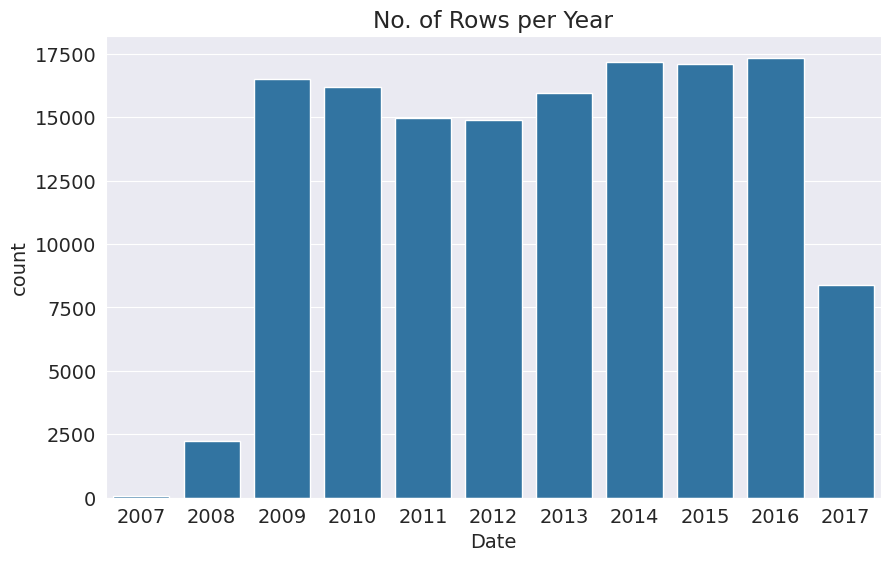

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

**Big NOte**
- in real world while dealing with data we wil preict the future data so what we do here is use the upto 2015 data as the train and 2015 as val and we use the next 2 years data as the test data os it will looks like real time

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
display(year)

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int32

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

Let's save our work before continuing.

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

 **Big Note**: Sometimes the some cols are related to the trgets we should not inclde that into the training set make sure that before train
 - example in our data set it there contains raintmrw and rainfalltmrw in ml as col names
 if consider raintmrw as traget and train all othres it was wrong
 - because here we considered the rain fall tmrw in ml a col which is related to the ot the traget itself so that we need check if there is any like that


We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       97988 non-null  object 
 1   MinTemp        97674 non-null  float64
 2   MaxTemp        97801 non-null  float64
 3   Rainfall       97988 non-null  float64
 4   Evaporation    61657 non-null  float64
 5   Sunshine       57942 non-null  float64
 6   WindGustDir    91120 non-null  object 
 7   WindGustSpeed  91160 non-null  float64
 8   WindDir9am     90969 non-null  object 
 9   WindDir3pm     96036 non-null  object 
 10  WindSpeed9am   97114 non-null  float64
 11  WindSpeed3pm   96919 non-null  float64
 12  Humidity9am    96936 non-null  float64
 13  Humidity3pm    96872 non-null  float64
 14  Pressure9am    88876 non-null  float64
 15  Pressure3pm    88857 non-null  float64
 16  Cloud9am       63000 non-null  float64
 17  Cloud3pm       61966 non-null  float64
 18  Temp9am   

In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       97988 non-null  object 
 1   MinTemp        97674 non-null  float64
 2   MaxTemp        97801 non-null  float64
 3   Rainfall       97988 non-null  float64
 4   Evaporation    61657 non-null  float64
 5   Sunshine       57942 non-null  float64
 6   WindGustDir    91120 non-null  object 
 7   WindGustSpeed  91160 non-null  float64
 8   WindDir9am     90969 non-null  object 
 9   WindDir3pm     96036 non-null  object 
 10  WindSpeed9am   97114 non-null  float64
 11  WindSpeed3pm   96919 non-null  float64
 12  Humidity9am    96936 non-null  float64
 13  Humidity3pm    96872 non-null  float64
 14  Pressure9am    88876 non-null  float64
 15  Pressure3pm    88857 non-null  float64
 16  Cloud9am       63000 non-null  float64
 17  Cloud3pm       61966 non-null  float64
 18  Temp9am   

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

The code in the selected cell identifies and separates the numeric and categorical columns from your training data (`train_inputs`).

- `numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()`: This line selects all columns from the `train_inputs` DataFrame that have a numerical data type (like integers or floats) and stores their names as a list in the `numeric_cols` variable. `np.number` is used to specify the numerical data types.
- `categorical_cols = train_inputs.select_dtypes('object').columns.tolist()`: This line does the same for columns that have the data type 'object', which typically represents categorical data (like strings), and stores their names as a list in the `categorical_cols` variable.

This separation is important for preprocessing, as numerical and categorical features often require different handling (like scaling for numeric and encoding for categorical).

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Let's view some statistics for the numeric columns.

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

Let's save our work before continuing.

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

- it is better to replace with the median rather than mean becasue there may be outlier which will make affect the mean

In [ ]:
?SimpleImputer # this will open the help tap explains about this

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [ ]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

The missing values are now filled in with the mean of each column.

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

> **EXERCISE**: Apply some other imputation techniques and observe how they change the results of the model. You can learn more about other imputation techniques here: https://scikit-learn.org/stable/modules/impute.html

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [ ]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

- when we put all the into the ml algo  we apply the weights to them and compute the loss ultimately the loss is single numbre
- and we say taht the higer the loss worse the model
- but what happens is if a certain feature has a very high range of values , may be like rainfall takes values that are i the thousands.
but minimum and masimum that are take the values less than 10
- there is a cetain cols where the values are 0.00 point  something, which are basically in the range of values . bacially in decimalls
- so what happens is that the values, which have a very high magnitude tend to dominate the loss becuase it ultimately all , all thes nums getting mul and added together.
so the values hta have a high magnitude the features that have a high range tend to dominate the loss
- but features that have a lowe absolute values and features htat have lower range of values. tend to not show up not dominate in loss
- so what happes is that if what dominates the loss dominates the optimization process.
- so that means the values which hvae these high numbers are going to thier rates are goinig to change al ot , but the values which have low nubers or smaller ranges, their values, thier rates are nto going to chage tha much during optimizaton
- **Note**:  for better understanding about the impo of standardizing the inputts go the timestap 3 hr 33 min in that video https://youtu.be/hDKCxebp88A?si=2wvETRpKs-4hQm1x
> - **Normalizaion vs Standardizarion**:
https://youtu.be/sxEqtjLC0aM?si=Qbs3oFGCuN6IJ9r5


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range. ![](https://i.ytimg.com/vi/Ofxl8BPsdCM/sddefault.jpg)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

- checck the scaling the data in here

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.211879      0.100680      0.000017      0.000255      0.036232   
std        0.003525      0.002493      0.000062      0.000149      0.013857   
min        0.200472      0.090987      0.000000      0.000000      0.000000   
25%        0.209372      0.098849      0.000000      0.000181      0.035672   
50%        0.211764      0.100457      0.000000      0.000260      0.036293   
75%        0.214434      0.102422      0.000006      0.000266      0.043757   
max        0.224057      0.109641      0.002695      0.003919      0.068014   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       -0.044457      0.000834      0.002479      0.006863      0.005147   
std         0.000794      0.000529      0.001166      0.001890      0.002064   
min        -0.046512      0.000000      0.000000      0.000000      0.000000   
25%        -0.045009      0.000414      0.001718      0.005700      0.003700   
50%        -0.044529      0.000769      0.002510      0.006900      0.005200   
75%        -0.044108      0.001124      0.003171      0.008300      0.006500   
max        -0.038760      0.005148      0.011494      0.010000      0.010000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean     -16.196496    -15.623861      0.053688      0.054855      0.162597   
std        0.001840      0.001706      0.028387      0.026448      0.002842   
min      -16.206612    -15.633114      0.000000      0.000000      0.152477   
25%      -16.197623    -15.624947      0.037037      0.037037      0.160533   
50%      -16.196461    -15.623832      0.054706      0.055546      0.162492   
75%      -16.195328    -15.622797      0.074074      0.074074      0.164584   
max      -16.190083    -15.617600      0.111111      0.111111      0.172996   

            Temp3pm  
count  97988.000000  
mean       0.113572  
std        0.002509  
min        0.103757  
25%        0.111752  
50%        0.113373  
75%        0.115252  
max        0.122620

Learn more about scaling techniques here: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Let's save our work before continuing.

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using `get_feature_names`.

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [ ]:
print(train_inputs[categorical_cols].columns)
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray();
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]).toarray();
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).toarray();

/tmp/ipython-input-3822541797.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3822541797.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3822541797.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3822541797.py:1: PerformanceWarning:

We can verify that these new columns have been added to our training, test and validation sets.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.216547  0.105889  0.000000      0.00026  0.036293   
2499     Albury  0.216825  0.104459  0.000003      0.00026  0.036293   
2500     Albury  0.215435  0.100707  0.000016      0.00026  0.036293   
2501     Albury  0.214823  0.100922  0.000113      0.00026  0.036293   
2502     Albury  0.213822  0.100636  0.000049      0.00026  0.036293   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.207147  0.100243  0.000000      0.00026  0.036293   
145455    Uluru  0.206757  0.100814  0.000000      0.00026  0.036293   
145456    Uluru  0.207202  0.101493  0.000000      0.00026  0.036293   
145457    Uluru  0.208204  0.102065  0.000000      0.00026  0.036293   
145458    Uluru  0.209539  0.102101  0.000000      0.00026  0.036293   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE      -0.043627        NaN        ESE      0.000000   
2499           SSE      -0.043868        SSE         SE      0.000533   
2500           ENE      -0.043988        ESE        ENE      0.000651   
2501           SSE      -0.044529         SE        SSE      0.000533   
2502           ENE      -0.045009         SE        SSE      0.000355   
...            ...            ...        ...        ...           ...   
145454           E      -0.045009        ESE          E      0.000888   
145455           E      -0.045009         SE        ENE      0.000769   
145456         NNW      -0.045550         SE          N      0.000769   
145457           N      -0.044649         SE        WNW      0.000533   
145458          SE      -0.045190        SSE          N      0.000769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.000925       0.0046       0.0017   -16.197623   -15.625382   
2499        0.002246       0.0054       0.0030   -16.198251   -15.625587   
2500        0.005153       0.0062       0.0067   -16.197459   -15.623949   
2501        0.002246       0.0074       0.0065   -16.196394   -15.623514   
2502        0.001189       0.0092       0.0063   -16.196831   -15.624179   
...              ...          ...          ...          ...          ...   
145454      0.001718       0.0059       0.0027   -16.194536   -15.622310   
145455      0.001453       0.0051       0.0024   -16.194563   -15.622541   
145456      0.001189       0.0056       0.0021   -16.194864   -15.622848   
145457      0.001189       0.0053       0.0024   -16.195547   -15.623437   
145458      0.000925       0.0051       0.0024   -16.195984   -15.623514   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.086420  0.037037  0.166720  0.119157        No                0.0   
2499    0.098765  0.098765  0.166141  0.117315        No                0.0   
2500    0.098765  0.098765  0.164806  0.112820       Yes                0.0   
2501    0.098765  0.098765  0.163649  0.113594       Yes                0.0   
2502    0.098765  0.098765  0.162759  0.113815       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.054706  0.055546  0.159287  0.113336        No                0.0   
145455  0.054706  0.055546  0.159599  0.113888        No                0.0   
145456  0.054706  0.055546  0.159955  0.114662        No                0.0   
145457  0.054706  0.055546  0.160667  0.115252        No                0.0   
145458  0.037037  0.024691  0.161824  0.115215        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [ ]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.212654  0.100636  0.000004      0.00026  0.036293   
1        Albury  0.209316  0.101422  0.000000      0.00026  0.036293   
2        Albury  0.212375  0.101636  0.000000      0.00026  0.036293   
3        Albury  0.210317  0.102458  0.000000      0.00026  0.036293   
4        Albury  0.214934  0.103995  0.000007      0.00026  0.036293   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.214600  0.104316  0.000000      0.00026  0.036293   
144549    Uluru  0.213599  0.105603  0.000000      0.00026  0.036293   
144550    Uluru  0.214823  0.105960  0.000000      0.00026  0.036293   
144551    Uluru  0.216380  0.106210  0.000000      0.00026  0.036293   
144552    Uluru  0.217715  0.106603  0.000000      0.00026  0.036293   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W      -0.044228          W        WNW      0.001183   
1              WNW      -0.044228        NNW        WSW      0.000237   
2              WSW      -0.044108          W        WSW      0.001124   
3               NE      -0.045430         SE          E      0.000651   
4                W      -0.044408        ENE         NW      0.000414   
...            ...            ...        ...        ...           ...   
144548         SSE      -0.044288        ESE        SSE      0.001420   
144549          NE      -0.045009        ENE         SW      0.001124   
144550         ESE      -0.044529        ESE        SSE      0.001538   
144551         ESE      -0.044288        ESE        SSW      0.001657   
144552         WNW      -0.042305        ENE        SSW      0.001775   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.003171       0.0071       0.0022   -16.199180   -15.625920   
1           0.002907       0.0044       0.0025   -16.198388   -15.625741   
2           0.003435       0.0038       0.0030   -16.199208   -15.625510   
3           0.001189       0.0045       0.0016   -16.196476   -15.624461   
4           0.002642       0.0082       0.0033   -16.198333   -15.626202   
...              ...          ...          ...          ...          ...   
144548      0.003435       0.0022       0.0013   -16.197432   -15.625229   
144549      0.002642       0.0016       0.0008   -16.197842   -15.625792   
144550      0.001189       0.0015       0.0008   -16.198033   -15.625690   
144551      0.002246       0.0022       0.0009   -16.197459   -15.625382   
144552      0.001718       0.0016       0.0009   -16.197978   -15.626150   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
0       0.098765  0.055546  0.162625  0.113667        No                0.0   
1       0.054706  0.055546  0.162759  0.114588        No                0.0   
2       0.054706  0.024691  0.164450  0.114183        No                0.0   
3       0.054706  0.055546  0.163159  0.115399        No                0.0   
4       0.086420  0.098765  0.163026  0.116578        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144548  0.054706  0.055546  0.165652  0.117351        No                0.0   
144549  0.054706  0.055546  0.167966  0.118457        No                0.0   
144550  0.054706  0.055546  0.168322  0.118788        No                0.0   
144551  0.054706  0.055546  0.168367  0.119341        No                0.0   
144552  0.054706  0.055546  0.168500  0.119415        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
0                   0.0              1.0                    0.0   
1                   0.0              1.0                    0.0   
2                   0.0              1.0                    0.0   
3                   0.0              1.0                    0.0   
4                   0.0              1.0                    0.0   
.

Let's save our work before continuing.

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

The code in the selected cell saves your processed training, validation, and test input DataFrames to disk in the Parquet format.

*   `train_inputs.to_parquet('train_inputs.parquet')`: This line saves the `train_inputs` DataFrame to a file named `train_inputs.parquet`.
*   `val_inputs.to_parquet('val_inputs.parquet')`: This line saves the `val_inputs` DataFrame to a file named `val_inputs.parquet`.
*   `test_inputs.to_parquet('test_inputs.parquet')`: This line saves the `test_inputs` DataFrame to a file named `test_inputs.parquet`.

Saving data in Parquet format is beneficial because it's a columnar storage format that is generally more efficient for storage and faster for reading compared to CSV files, especially for large datasets. This step allows you to quickly load the preprocessed data later without needing to rerun all the data cleaning and preprocessing steps.

In [ ]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 53.9 ms, sys: 3.78 ms, total: 57.7 ms
Wall time: 59.9 ms


 **Note** If we do on notebook after end of the session we will loose the data in collab

The code in the selected cell saves your target variables (the 'RainTomorrow' column) for the training, validation, and test sets to separate Parquet files.

*   `pd.DataFrame(train_targets).to_parquet('train_targets.parquet')`: This line converts the `train_targets` Series into a DataFrame and then saves it to a file named `train_targets.parquet`.
*   `pd.DataFrame(val_targets).to_parquet('val_targets.parquet')`: Similarly, this converts the `val_targets` Series into a DataFrame and saves it to `val_targets.parquet`.
*   `pd.DataFrame(test_targets).to_parquet('test_targets.parquet')`: This does the same for the `test_targets` Series, saving it to `test_targets.parquet`.

The `%%time` at the beginning is a Colab magic command that measures and reports the execution time of the cell. Saving the targets to Parquet files allows you to quickly load them back later, just like you did with the input features, without needing to regenerate them.

We can read the data back using `pd.read_parquet`.

In [ ]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 334 ms, sys: 164 ms, total: 497 ms
Wall time: 851 ms


Let's verify that the data was loaded properly.

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [ ]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.211541  0.104424       0.0      0.00026  0.036293   
2134     Albury  0.213822  0.106603       0.0      0.00026  0.036293   
2135     Albury  0.214712  0.106139       0.0      0.00026  0.036293   
2136     Albury  0.219662  0.104281       0.0      0.00026  0.036293   
2137     Albury  0.215769  0.105031       0.0      0.00026  0.036293   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.216603  0.104852       0.0      0.00026  0.036293   
144914    Uluru  0.215212  0.105460       0.0      0.00026  0.036293   
144915    Uluru  0.214934  0.105710       0.0      0.00026  0.036293   
144916    Uluru  0.216325  0.106353       0.0      0.00026  0.036293   
144917    Uluru  0.215935  0.105817       0.0      0.00026  0.036293   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW      -0.045069        ESE          W      0.000414   
2134            NE      -0.043507        ESE        ESE      0.000533   
2135           NNE      -0.043988         NE          N      0.001183   
2136           NNE      -0.044408        ESE          W      0.000414   
2137             E      -0.044889        SSE         SE      0.000414   
...            ...            ...        ...        ...           ...   
144913           E      -0.043747        ESE          E      0.002071   
144914         ESE      -0.043627          E        ESE      0.001775   
144915           E      -0.043507          E         SE      0.001953   
144916           E      -0.043327          E        SSE      0.001183   
144917          SE      -0.043507        ESE          S      0.001183   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.001453       0.0045       0.0014   -16.197596   -15.624922   
2134        0.001189       0.0045       0.0012   -16.196913   -15.624563   
2135        0.002642       0.0035       0.0019   -16.196394   -15.624589   
2136        0.000925       0.0046       0.0037   -16.197568   -15.624640   
2137        0.001189       0.0060       0.0034   -16.196530   -15.623974   
...              ...          ...          ...          ...          ...   
144913      0.002642       0.0023       0.0012   -16.197678   -15.625152   
144914      0.004096       0.0017       0.0007   -16.197268   -15.624947   
144915      0.002907       0.0012       0.0007   -16.197842   -15.625818   
144916      0.002246       0.0012       0.0012   -16.199317   -15.627072   
144917      0.003699       0.0046       0.0018   -16.199290   -15.626790   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133    0.054706  0.055546  0.164450  0.117683        No                0.0   
2134    0.054706  0.055546  0.166498  0.119709        No                0.0   
2135    0.054706  0.055546  0.168100  0.119267        No                0.0   
2136    0.098765  0.061728  0.167299  0.117020        No                0.0   
2137    0.098765  0.055546  0.166498  0.117609        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144913  0.054706  0.055546  0.165919  0.117794        No                0.0   
144914  0.054706  0.055546  0.166987  0.118530        No                0.0   
144915  0.054706  0.055546  0.167610  0.118420        No                0.0   
144916  0.054706  0.012346  0.169035  0.119783        No                0.0   
144917  0.054706  0.055546  0.166587  0.118825        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
.

In [ ]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

**Note** As the sklearn is upgraded new functions added by removing old

In [ ]:
!pip install scikit-learn==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.1
    Uninstalling scikit-learn-1.7.1:
      Successfully uninstalled scikit-learn-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
?LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

what is the use of liblinear solver

We can train the model using `model.fit`.

In [ ]:
model.fit( train_inputs[numeric_cols + encoded_cols], train_targets);

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


Let's check the weights and biases of the trained model.

In [ ]:
input_train = train_inputs[numeric_cols + encoded_cols]

NameError: name 'input_train' is not defined

In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.coef_.tolist())

[[6.843624845143008, -2.9953733856503377, 0.13969717596205627, 0.06451313889811959, -23.75233406219758, 4.851778020223614, 1.1004887494720554, 2.648583302181416, 4.82641435045532, 14.830078304522166, 0.058766169588222145, 0.041440206853422604, 6.160716832290724, 19.36999179015439, 2.1839415151804324, -5.136827069178194, 0.12151553166805973, 0.012596834643414798, -0.009090464102971691, -0.5633506745039224, 0.21466680859382387, -0.14098883900106574, -0.09418087236717819, 0.3278176217486717, 0.6943425616706471, -0.30477453025532447, -0.41928455237578416, 0.41581254484461533, 0.4000684508167537, 0.16234094892539327, 0.5093614901373724, -0.2620003987160829, 0.11323003221364773, 0.01667985170302818, -0.5413144604982335, -0.6325826730881939, -0.669770407166719, -0.460430490932963, -0.14103090258192488, 0.4422433803566666, 0.19058406084957874, -0.12333902419767896, 0.4369330324528198, 0.3257526137320134, -0.38075723934330696, -0.2206231917641957, 0.16846208011074612, 0.21909834906471484, 0.088

In [ ]:
print(model.intercept_)

[-0.62016701]


In [ ]:
weight_df = pd.DataFrame({
    'features': numeric_cols + encoded_cols,
    'weights': model.coef_.tolist()[0]
})
weight_df

features    weights
0           MinTemp   6.843625
1           MaxTemp  -2.995373
2          Rainfall   0.139697
3       Evaporation   0.064513
4          Sunshine -23.752334
..              ...        ...
113  WindDir3pm_WNW   0.016582
114  WindDir3pm_WSW  -0.206042
115  WindDir3pm_nan   0.249020
116    RainToday_No  -0.910067
117   RainToday_Yes   0.289900

[118 rows x 2 columns]

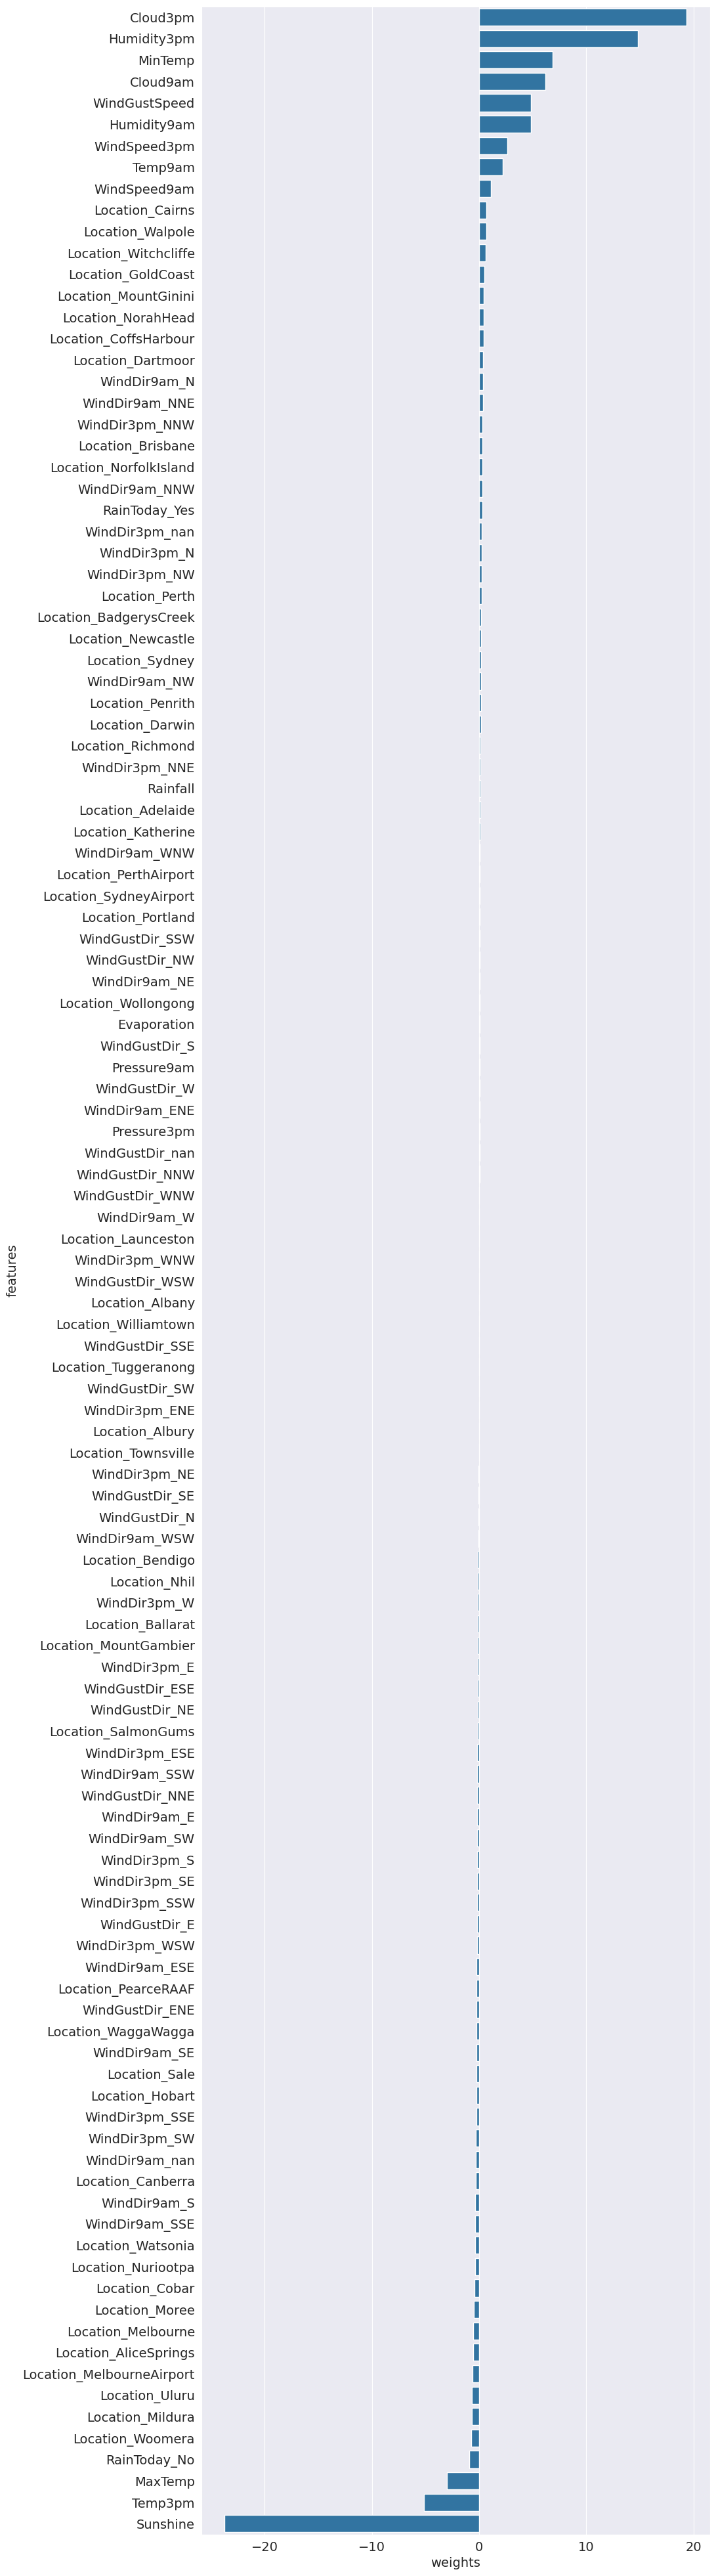

In [ ]:
plt.figure(figsize=(10,50))
sns.barplot(data = weight_df.sort_values(
    by='weights', ascending=False
), x='weights', y='features');

Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.
- sign is indicates the postive or negative corealtion with the data

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs[56]

array([0.87491194, 0.12508806])

Comparison of Actual and Predicted values:


Actual Predicted
0     No        No
1     No        No
2     No        No
3     No        No
4     No        No

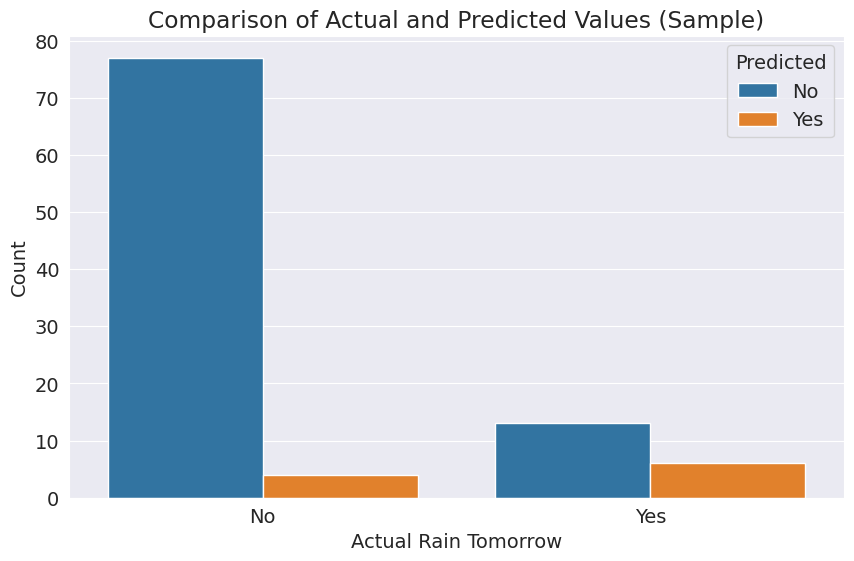

In [ ]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': train_targets, 'Predicted': train_preds})

# Display the first few rows of the comparison DataFrame
print("Comparison of Actual and Predicted values:")
display(comparison_df.head())

# Plot the comparison (showing a small sample for better visualization)
plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df.sample(100), x='Actual', hue='Predicted')
plt.title('Comparison of Actual and Predicted Values (Sample)')
plt.xlabel('Actual Rain Tomorrow')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': train_targets, 'Predicted': train_preds})

# Display the first few rows of the comparison DataFrame
print("Comparison of Actual and Predicted values:")
display(comparison_df.head())

# Plot the comparison using Plotly
fig = px.histogram(comparison_df,
                   x='Actual',
                   color='Predicted',
                   title='Comparison of Actual and Predicted Values',
                   barmode='group')
fig.show()

Comparison of Actual and Predicted values:


Actual Predicted
0     No        No
1     No        No
2     No        No
3     No        No
4     No        No

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.8115075315344736

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train_targets.value_counts()

RainTomorrow
No     76190
Yes    21798
Name: count, dtype: int64

In [ ]:
pd.Series(train_preds).value_counts()

No     87300
Yes    10688
Name: count, dtype: int64

In [ ]:
true_postive = (train_targets == 'Yes') & (train_preds == 'Yes')
true_negtive = (train_targets == 'No') & (train_preds == 'No')


In [ ]:
true_postive.sum()

np.int64(7008)

In [ ]:
train_targets.value_counts().loc['Yes']

np.int64(21798)

In [ ]:
TP_prob = true_postive.sum() / train_targets.value_counts().loc['Yes']
TN_prob = true_negtive.sum() / train_targets.value_counts().loc['No']

In [ ]:
print(TP_prob)
print(TN_prob)

0.3214973850812001
0.9516996981231133


In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.9516997 , 0.0483003 ],
       [0.67850261, 0.32149739]])

we can see that output below in the confusion marix

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.19%


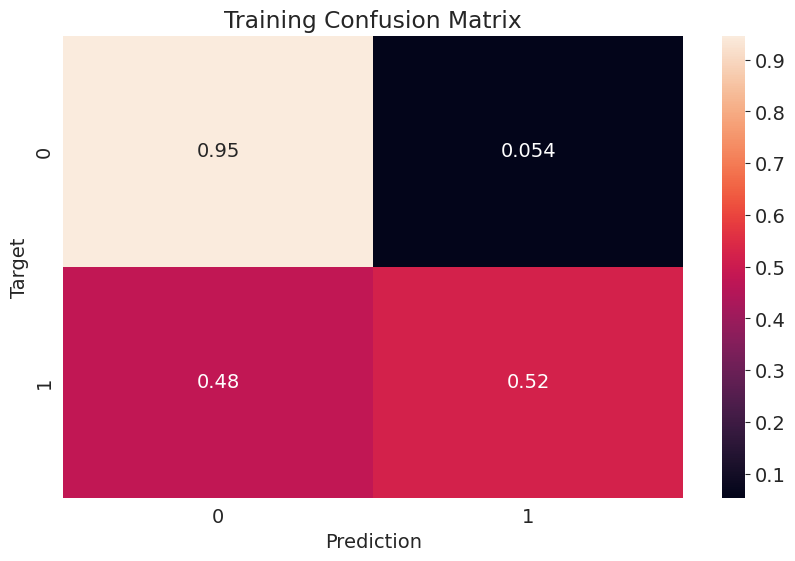

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

here dark balck indicates good
here red areas need to be decrease

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 81.71%


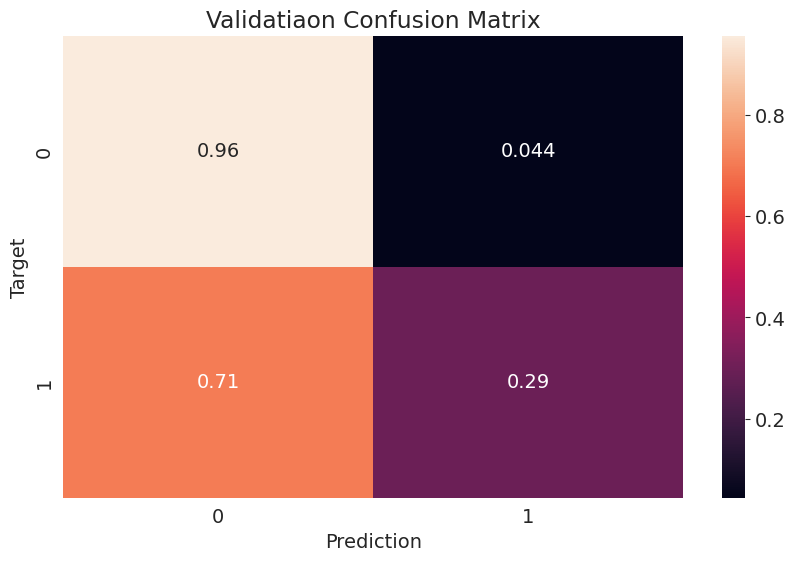

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 79.87%


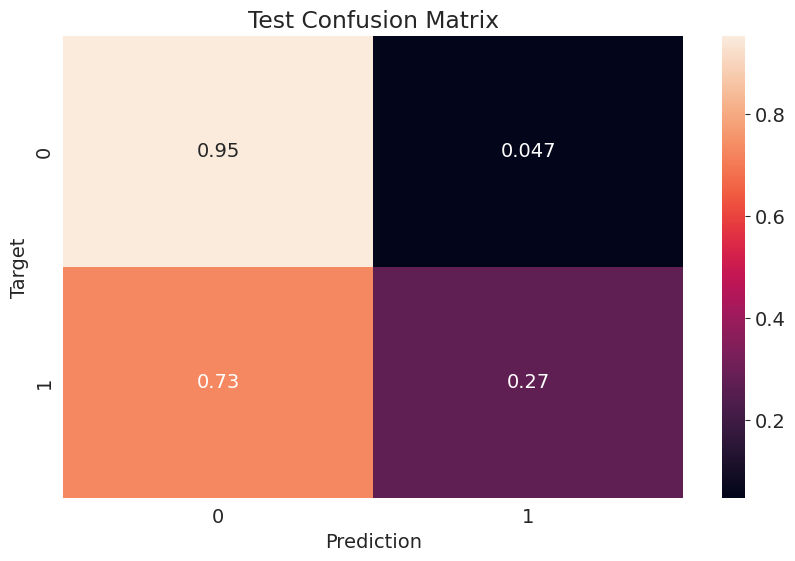

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test') # test set is futrue data we did it initially

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before.

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [ ]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [ ]:
random_guess(X_test)

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

In [ ]:
all_no(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [ ]:
# this not a good models we have the generalized model which give the educated the guess

Let's check the accuracies of these two models on the test set.

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.501905873201089

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%.

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

`LogisticRegression` model with different arguments and try to achieve a higher accuracy. The arguments used for initializing the model are called hyperparameters (to differentiate them from weights and biases - parameters that are learned by the model during training). You can find the full list of arguments here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's save our work before continuing.

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [ ]:
new_input_df = pd.DataFrame([new_input])

In [ ]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

We've now created a Pandas dataframe with the same columns as `raw_df` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [ ]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols]).toarray()

/tmp/ipython-input-2648599453.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2648599453.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2648599453.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2648599453.py:3: PerformanceWarning:

In [ ]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

We can now make a prediction using `model.predict`.

In [ ]:
prediction = model.predict(X_new_input)

In [ ]:
prediction

array(['Yes'], dtype=object)

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [ ]:
prob = model.predict_proba(X_new_input)[0]

In [ ]:
prob

array([2.14282303e-09, 9.99999998e-01])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [ ]:
def predict_input(single_input):
    # Create a DataFrame from the single input with all necessary columns
    input_df = pd.DataFrame([single_input], columns=input_cols)

    # Impute missing numerical values
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

    # Scale numeric features
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

    # One-hot encode categorical features and join with numeric features
    input_encoded_df = pd.DataFrame(encoder.transform(input_df[categorical_cols]).toarray(), columns=encoded_cols)

    # Ensure the order of columns is the same as the training data
    X_input = pd.concat([input_df[numeric_cols], input_encoded_df], axis=1)

    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Uluru',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 0,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 10,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 10,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
predict_input(new_input)

('Yes', np.float64(0.9999999770917002))

check the cor -relation between the data
in the with input_target changing it 0 and one

In [ ]:
# Convert target variable to numerical
train_targets_numeric = train_targets.map({'No': 0, 'Yes': 1})

# Calculate correlation between numerical input columns and the numerical target
correlation_with_target = train_inputs[numeric_cols].corrwith(train_targets_numeric)

# Display the correlations
print("Correlation of numerical features with RainTomorrow:")
display(correlation_with_target.sort_values(ascending=False))

Correlation of numerical features with RainTomorrow:


Humidity3pm      0.448244
Cloud3pm         0.315692
Cloud9am         0.263841
Humidity9am      0.259722
Rainfall         0.244533
WindGustSpeed    0.222762
WindSpeed9am     0.091466
MinTemp          0.086989
WindSpeed3pm     0.082986
Temp9am         -0.026093
Evaporation     -0.099241
MaxTemp         -0.163569
Temp3pm         -0.195530
Pressure3pm     -0.216852
Pressure9am     -0.237723
Sunshine        -0.352289
dtype: float64

> **EXERCISE**: Try changing the values in `new_input` and observe how the predictions and probabilities change. Try different values of location, temperature, humidity, pressure etc. Try to get an _intuitive feel_ of which columns have the greatest effect on the result of the model.

In [ ]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Let's save our work before continuing.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.

In [ ]:
import joblib

Let's first create a dictionary containing all the required objects.

In [ ]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

We can now save this to a file using `joblib.dump`

In [ ]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

The object can be loaded back using `joblib.load`

In [ ]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

Let's use the loaded model to make predictions on the original test set.

In [ ]:
aussie_rain2['model'].coef_

array([[ 6.84362485e+00, -2.99537339e+00,  1.39697176e-01,
         6.45131389e-02, -2.37523341e+01,  4.85177802e+00,
         1.10048875e+00,  2.64858330e+00,  4.82641435e+00,
         1.48300783e+01,  5.87661696e-02,  4.14402069e-02,
         6.16071683e+00,  1.93699918e+01,  2.18394152e+00,
        -5.13682707e+00,  1.21515532e-01,  1.25968346e-02,
        -9.09046410e-03, -5.63350675e-01,  2.14666809e-01,
        -1.40988839e-01, -9.41808724e-02,  3.27817622e-01,
         6.94342562e-01, -3.04774530e-01, -4.19284552e-01,
         4.15812545e-01,  4.00068451e-01,  1.62340949e-01,
         5.09361490e-01, -2.62000399e-01,  1.13230032e-01,
         1.66798517e-02, -5.41314460e-01, -6.32582673e-01,
        -6.69770407e-01, -4.60430491e-01, -1.41030903e-01,
         4.42243380e-01,  1.90584061e-01, -1.23339024e-01,
         4.36933032e-01,  3.25752614e-01, -3.80757239e-01,
        -2.20623192e-01,  1.68462080e-01,  2.19098349e-01,
         8.83913110e-02,  8.05381998e-02,  1.47724094e-0

In [ ]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.7987164527421237

As expected, we get the same result as the original model.

Let's save our work before continuing. We can upload our trained models to Jovian using the `outputs` argument.

## Putting it all Together

While we've covered a lot of ground in this tutorial, the number of lines of code for processing the data and training the model is fairly small. Each step requires no more than 3-4 lines of code.

### Data Preprocessing

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs_raw = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs_raw = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs_raw = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs_raw.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs_raw.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs_raw[numeric_cols])
train_inputs_imputed = pd.DataFrame(imputer.transform(train_inputs_raw[numeric_cols]), index=train_inputs_raw.index, columns=numeric_cols)
val_inputs_imputed = pd.DataFrame(imputer.transform(val_inputs_raw[numeric_cols]), index=val_inputs_raw.index, columns=numeric_cols)
test_inputs_imputed = pd.DataFrame(imputer.transform(test_inputs_raw[numeric_cols]), index=test_inputs_raw.index, columns=numeric_cols)


# Scale numeric features
scaler = MinMaxScaler().fit(train_inputs_imputed[numeric_cols])
train_inputs_scaled = pd.DataFrame(scaler.transform(train_inputs_imputed[numeric_cols]), index=train_inputs_imputed.index, columns=numeric_cols)
val_inputs_scaled = pd.DataFrame(scaler.transform(val_inputs_imputed[numeric_cols]), index=val_inputs_imputed.index, columns=numeric_cols)
test_inputs_scaled = pd.DataFrame(scaler.transform(test_inputs_imputed[numeric_cols]), index=test_inputs_imputed.index, columns=numeric_cols)


# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore').fit(train_inputs_raw[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) # Use get_feature_names_out

train_inputs_encoded = pd.DataFrame(encoder.transform(train_inputs_raw[categorical_cols]).toarray(), index=train_inputs_raw.index, columns=encoded_cols)
val_inputs_encoded = pd.DataFrame(encoder.transform(val_inputs_raw[categorical_cols]).toarray(), index=val_inputs_raw.index, columns=encoded_cols)
test_inputs_encoded = pd.DataFrame(encoder.transform(test_inputs_raw[categorical_cols]).toarray(), index=test_inputs_raw.index, columns=encoded_cols)

# Concatenate processed features
train_inputs = pd.concat([train_inputs_scaled, train_inputs_encoded], axis=1)
val_inputs = pd.concat([val_inputs_scaled, val_inputs_encoded], axis=1)
test_inputs = pd.concat([test_inputs_scaled, test_inputs_encoded], axis=1)


# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]
print("Done")

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)
Done


> **EXERCISE**: Try to explain each line of code in the above cell in your own words. Scroll back to relevant sections of the notebook if needed.

### Model Training and Evaluation


Validation : Accuracy: 85.39%
Test : Accuracy: 84.22%


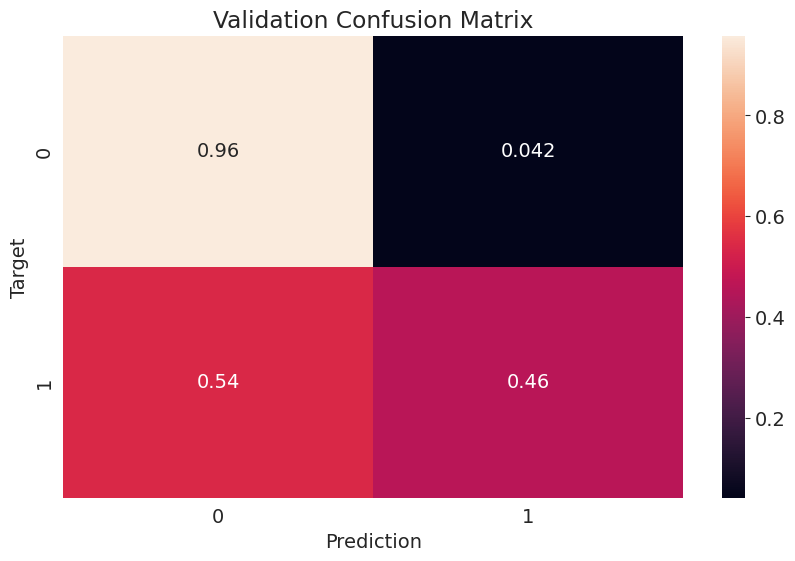

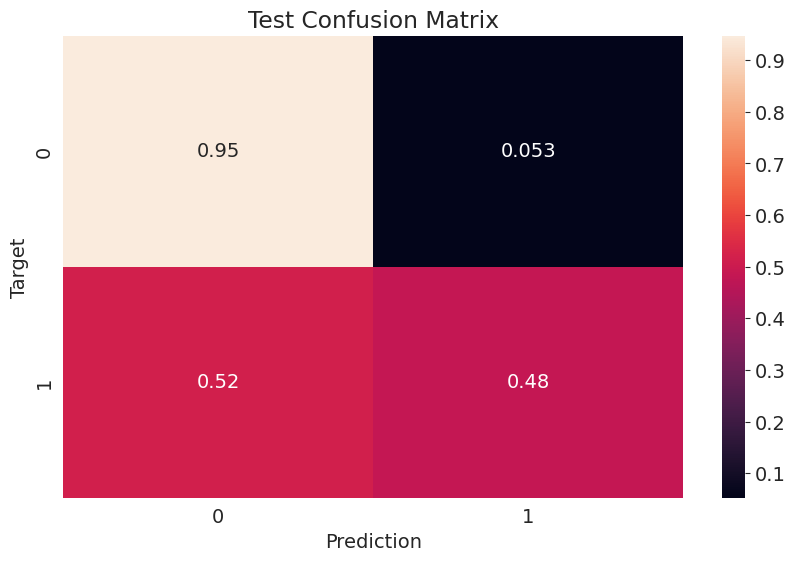

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import  joblib

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

# Evaluate on validation and test set
print("Validation :", end = " ")
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
print("Test :", end = " ")
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Save the trained model & load it back
aussie_rain = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols, 'encoded_cols': encoded_cols}
joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')

### Prediction on Single Inputs

In [185]:
def predict_input(single_input):
    # Step 1: Create DataFrame from input
    input_df = pd.DataFrame([single_input])

    # Step 2: Handle numeric columns
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols]) # handles null values
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols]) # normalizes the value using min max this models are areready trained before

    # Step 3: Handle categorical columns with encoder
    input_encoded = pd.DataFrame(
        encoder.transform(input_df[categorical_cols]).toarray(),
        index=input_df.index,
        columns=encoded_cols
    )

    # Step 4: Concatenate numeric and encoded categorical features
    X_input = pd.concat([input_df[numeric_cols], input_encoded], axis=1)



    # Step 5: Prediction
    print("Processed input (numeric + encoded categorical):")
    print(X_input.values.tolist())

    print("\nModel classes (possible outputs):")
    print(model.classes_)

    pred = model.predict(X_input)[0]
    print("\nPredicted class:")
    print(pred)

    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    print("\nPrediction probabilities for each class:")
    print(model.predict_proba(X_input))


    return pred, prob


new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)

Processed input (numeric + encoded categorical):
[[0.7476415094339622, 0.7145593869731801, 0.027493261455525605, 0.050970873786407765, 0.5320981700292046, 0.3565891472868217, 0.14942528735632182, 0.22988505747126436, 0.89, 0.58, 0.4016528925619838, 0.37128712871287206, 0.8888888888888888, 0.5555555555555556, 0.6854663774403471, 0.744140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

Model classes (possible outputs):
['No' 'Yes']

Predicted class:
Yes

Prediction probabilities for each class:
[[0.35174969 0.64825031]]


('Yes', np.float64(0.6482503149277558))

`axis=1` means operation is done **horizontally across columns**.

In this code:

```python
X_input = pd.concat([input_df[numeric_cols], input_encoded], axis=1)
```

* `axis=1` tells Pandas to **concatenate DataFrames column-wise** (side by side).
* If it was `axis=0`, it would concatenate **row-wise** (one below the other).


Let's save our work using Jovian.

## Summary and References

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">


To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn. We covered the following topics in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back



Check out the following resources to learn more:

* https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1
* https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
* https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction#Baseline



Try training logistic regression models on the following datasets:

- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.


In [ ]:
print("Info of train_inputs[categorical_cols] before encoding:")
train_inputs[categorical_cols].info()

print("\nHead of train_inputs[categorical_cols] before encoding:")
display(train_inputs[categorical_cols].head())

print("\nUnique values in each categorical column before encoding:")
display(train_inputs[categorical_cols].nunique())

In [ ]:
!pip install scikit-learn --upgrade --quiet --force-reinstall


-----

# 1\. Project Setup: Importing Libraries

The first step is to import all the necessary Python libraries that will be used throughout the script. 📚

```python
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
```

  * **`opendatasets`**: This library is a convenient tool for downloading datasets directly from online sources like Kaggle.
  * **`pandas`**: The cornerstone for data manipulation and analysis in Python. It's used here to read the data into DataFrames and perform various cleaning and transformation tasks.
  * **`numpy`**: A fundamental package for numerical computation. It's particularly useful for its array objects and mathematical functions. The code uses it to identify numeric data types (`np.number`).
  * **`sklearn`**: Short for Scikit-learn, this is the most popular machine learning library in Python. We specifically import:
      * `SimpleImputer`: To handle missing numerical data.
      * `MinMaxScaler`: To scale numerical features to a common range.
      * `OneHotEncoder`: To convert categorical features into a numerical format.

-----

## 2\. Data Acquisition and Initial Cleaning

Next, the script acquires the dataset and performs a critical initial cleaning step.

```python
# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

# Drop rows with missing target values
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
```

  * **Downloading Data**: `od.download()` fetches the "Weather Dataset (Rattle Package)" from Kaggle and saves it to a local directory.
  * **Loading Data**: `pd.read_csv()` loads the `weatherAUS.csv` file into a pandas DataFrame named `raw_df`. This DataFrame contains the raw, unprocessed data.
  * **Cleaning Target Columns**: The line `raw_df.dropna(...)` is a crucial cleaning step. Our goal is to predict `RainTomorrow`. If a row is missing the value for `RainTomorrow` (or `RainToday`), it's impossible to use that row to train or evaluate a supervised learning model. Therefore, these incomplete rows are removed to ensure data quality.

-----

## 3\. Data Splitting: Creating Training, Validation, and Test Sets

To properly train and evaluate a model, the data is split into three distinct sets. A **time-based split** is used here, which is essential for temporal data to prevent the model from learning from future data to predict the past (a problem known as **data leakage**).

```python
# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]
```

  * **Training Set (`train_df`)**: Contains all data from years **before 2015**. This is the largest portion of the data and is used to train the machine learning model.
  * **Validation Set (`val_df`)**: Contains data **only from the year 2015**. This set is used to tune the model's hyperparameters and make decisions during development without touching the test set.
  * **Test Set (`test_df`)**: Contains all data from years **after 2015**. This set is held out until the very end and is used to provide an unbiased evaluation of the final model's performance on unseen data.

-----

## 4\. Separating Inputs and Targets

The script now separates the dataset into features (inputs) and the variable we want to predict (targets).

```python
# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

train_inputs_raw = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
# ... and so on for val and test sets
```

  * **Inputs (`input_cols`)**: These are all the columns used to make a prediction (e.g., `MinTemp`, `WindGustSpeed`, `Location`). The code selects all columns except the first (`Date`) and the last (`RainTomorrow`).
  * **Target (`target_col`)**: This is the single column we want to predict, which is `RainTomorrow`.
  * The data is then split into `_inputs` and `_targets` for each of the training, validation, and test sets.

-----

## 5\. Feature Preprocessing

This is the core of the data preparation process, where raw data is transformed into a clean, numerical format suitable for a machine learning model.

### **Step 5.1: Identifying Feature Types**

First, the input columns are programmatically separated into numeric and categorical types.

```python
# Identify numeric and categorical columns
numeric_cols = train_inputs_raw.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs_raw.select_dtypes('object').columns.tolist()
```

This is an automated way to ensure that each type of column gets the correct preprocessing treatment.

### **Step 5.2: Imputing Missing Numerical Values** 🩹

Machine learning models cannot handle missing values (`NaN`). This step fills them in using the mean of each column.

```python
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs_raw[numeric_cols])
train_inputs_imputed = pd.DataFrame(imputer.transform(train_inputs_raw[numeric_cols]), ...)
# ... and so on for val and test sets
```

  * **`SimpleImputer(strategy='mean')`**: An object is created to fill missing values using the mean strategy.
  * **`.fit(train_inputs_raw[...])`**: The imputer is **fitted only on the training data**. This is critical. It calculates the mean of each numeric column from the training set and saves these values.
  * **`.transform(...)`**: The fitted imputer then uses the stored means to fill in missing values in the training, validation, and test sets. This ensures that no information from the validation or test sets leaks into the training process.

### **Step 5.3: Scaling Numeric Features** ⚖️

Features with vastly different scales (e.g., `Pressure` \~1000 vs. `Rainfall` \~10) can negatively impact some models. `MinMaxScaler` scales all numeric features to a standard range of **0 to 1**.

```python
# Scale numeric features
scaler = MinMaxScaler().fit(train_inputs_imputed[numeric_cols])
train_inputs_scaled = pd.DataFrame(scaler.transform(train_inputs_imputed[numeric_cols]), ...)
# ... and so on for val and test sets
```

  * **`MinMaxScaler()`**: An object is created to perform the scaling.
  * **`.fit(train_inputs_imputed[...])`**: Similar to imputation, the scaler is **fitted only on the training data**. It determines the minimum and maximum values for each column from the training data.
  * **`.transform(...)`**: It then uses these stored min/max values to scale the training, validation, and test sets consistently.

### **Step 5.4: One-Hot Encoding Categorical Features** 🔡➡️🔢

Models can only process numbers, not text categories (like 'Sydney' or 'North'). **One-hot encoding** converts each category into a new column with a binary value (1 if the category is present, 0 otherwise).

```python
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore').fit(train_inputs_raw[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs_encoded = pd.DataFrame(encoder.transform(train_inputs_raw[categorical_cols]).toarray(), ...)
# ... and so on for val and test sets
```

  * **`OneHotEncoder(handle_unknown='ignore')`**: An encoder is created. The `handle_unknown='ignore'` parameter is important: if a category appears in the validation/test set that was not seen in the training set, it will be handled gracefully (all its new columns will be 0) instead of causing an error.
  * **`.fit(train_inputs_raw[...])`**: The encoder learns all unique categories present in the training data's categorical columns.
  * **`.transform(...)`**: It then converts the categorical columns in all three datasets into a sparse matrix of 0s and 1s, which is then converted `.toarray()`.

-----

## 6\. Finalizing the Datasets

With all preprocessing complete, the processed numeric and categorical features are combined into final input DataFrames.

```python
# Concatenate processed features
train_inputs = pd.concat([train_inputs_scaled, train_inputs_encoded], axis=1)
val_inputs = pd.concat([val_inputs_scaled, val_inputs_encoded], axis=1)
test_inputs = pd.concat([test_inputs_scaled, test_inputs_encoded], axis=1)
```

The `pd.concat` function joins the scaled numeric DataFrames and the encoded categorical DataFrames side-by-side (`axis=1`) to create the final, model-ready `train_inputs`, `val_inputs`, and `test_inputs`.

-----

## 7\. Saving and Reloading Processed Data

Finally, the script saves the fully processed DataFrames to disk and then reloads them. This is a common practice in ML workflows to avoid re-running the time-consuming preprocessing steps every time you want to train a model. 💾

```python
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
# ... and so on for all inputs and targets

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
# ... and so on for all inputs and targets

print("Done")
```

  * **`.to_parquet()`**: This method saves the DataFrames in the **Parquet format**. Parquet is a highly efficient, column-oriented data format that is faster to read and takes up less disk space than traditional CSV files.
  * **`pd.read_parquet()`**: This function is used to load the saved data back into memory. The final `print("Done")` confirms that the entire script has executed successfully.

## Documentation is the best thing for revision. I do this while listening to the lectures of Jovian's 18-hour ML course, StatQuest on YouTube, and 3Blue1Brown for mathematical intuition. If I get stuck, I add notes about where I encountered issues and use Gemini or ChatGPT to help rectify errors and gain insights. My name is Hareesh, and I used these resources while building this notebook.

- While building this notebook, I used mostly Gemini to understand errors and the flow I should follow.
- I browse the internet and include images that provide intuition.
- I always include the ML architecture to understand the flow while learning so that I can refer to it anytime, making it easy to analyze the code.

* * *

# Summary of Notebook Steps

This notebook demonstrates a complete machine learning workflow for predicting rainfall in Australia using Logistic Regression. Here's a summary of the key steps performed:

## 1. Project Setup and Data Loading

- Necessary libraries like `pandas`, `numpy`, and modules from `sklearn` for preprocessing and modeling were imported.
- The "Weather Dataset (Rattle Package)" was downloaded from Kaggle using `opendatasets`.
- The dataset was loaded into a pandas DataFrame.
- Rows with missing values in the target columns (`RainToday` and `RainTomorrow`) were removed to ensure data quality for supervised learning.

## 2. Data Splitting

- The dataset was split into training, validation, and test sets based on the 'Date' column to perform a time-based split. Data before 2015 was used for training, 2015 for validation, and data after 2015 for testing. This approach prevents data leakage by ensuring the model is trained on past data and evaluated on future data.

## 3. Identifying Input and Target Columns

- The input features (all columns except 'Date' and 'RainTomorrow') and the target variable ('RainTomorrow') were identified and separated into distinct DataFrames for the training, validation, and test sets.
- Numeric and categorical columns within the input features were identified for appropriate preprocessing.

## 4. Feature Preprocessing

- **Imputing Missing Numeric Data**: Missing values in numeric columns were filled using the mean of each column calculated from the training data. The `SimpleImputer` from `sklearn.impute` was used for this.
- **Scaling Numeric Features**: Numeric features were scaled to a (0,1) range using the `MinMaxScaler` from `sklearn.preprocessing`. This ensures that features with larger values don't disproportionately influence the model. The scaler was fitted only on the training data and then used to transform all sets.
- **Encoding Categorical Data**: Categorical columns were converted into a numerical format using one-hot encoding with the `OneHotEncoder` from `sklearn.preprocessing`. This created new binary columns for each unique category. The encoder was fitted on the training data to identify all unique categories and then used to transform all sets.
- The preprocessed numeric and encoded categorical features were concatenated to create the final input DataFrames for training, validation, and testing.

## 5. Saving and Loading Processed Data

- The fully processed training, validation, and test sets for both inputs and targets were saved to disk in the efficient Parquet format using `pd.to_parquet`.
- These processed DataFrames were then reloaded from disk using `pd.read_parquet`, demonstrating how to quickly access the prepared data without repeating the preprocessing steps.

## 6. Training a Logistic Regression Model

- A Logistic Regression model from `sklearn.linear_model` was initialized and trained on the preprocessed training data.
- The model's coefficients (weights) and intercept were examined to understand the influence of different features on the prediction.

## 7. Making Predictions and Evaluating the Model

- Predictions were made on the training, validation, and test sets using the trained model.
- The accuracy of the model was evaluated on each set using `accuracy_score` from `sklearn.metrics`.
- Confusion matrices were generated and plotted for each set to visualize the performance, showing true positives, true negatives, false positives, and false negatives.
- The model's performance was compared to baseline models (random guessing and always predicting "No") to confirm that the trained model provides valuable insights.
- A helper function `predict_and_plot` was defined to streamline the prediction and evaluation process for different datasets.

## 8. Making Predictions on a Single Input

- A process was outlined and implemented to make predictions on a single new input, demonstrating how to apply the same preprocessing steps (imputation, scaling, encoding) to a single data point before feeding it to the trained model.
- A helper function `predict_input` was created to encapsulate this process for easy use with new data.

## 9. Saving and Loading Trained Models

- The trained model along with the fitted imputer, scaler, and encoder, as well as column names, were saved to disk using the `joblib` module.
- The saved model and preprocessing objects were loaded back into memory, and their functionality was verified by making predictions on the test set, confirming that the saved components can be used for inference.

This summary covers the major stages of the machine learning project demonstrated in this notebook, from data preparation through model training, evaluation, and deployment for single predictions.